# Introduction

My goal with this project is to deeply understand the dynamics of the stock market and provide insights that help investors make more informed decisions. By analyzing 20 years of historical Google stock data, I aim to uncover trends, measure volatility, and predict future price movements using advanced machine learning techniques. This analysis is designed to deliver actionable insights that enhance investment and trading strategies.

## Goal

The primary objective of my project is to predict Google’s future stock prices based on historical data. Leveraging advanced algorithms such as Long Short-Term Memory (LSTM) models, I aim to identify patterns and trends that guide investment decisions and minimize risks. By doing so, my goal is to empower investors and traders to make data-driven decisions with confidence.

### Methodology

**1. Data Source:**
 
- I worked with 20 years of Google stock data, including daily opening, closing, high, and low prices, along with trading volumes.
- The dataset was sourced from Kaggle: Google Stock Data 20 Years.

**2. Data Preparation:**

- I processed raw data by handling missing values and removing anomalies.
- The data was scaled and transformed into time-series sequences to ensure compatibility with LSTM models.


**3. Baseline Models:**

- I started with basic machine learning models like Linear Regression and Random Forest to establish initial benchmarks for performance.

**4. Advanced Modeling:**

- To capture complex temporal patterns, I implemented LSTM models and optimized them using hyperparameter tuning and callback methods such as EarlyStopping.

**5. Evaluation and Visualization:**

- I evaluated my models using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R².

- I visualized predictions alongside actual stock prices to provide clear insights into model performance.

### Scope

This project helped me develop a strong understanding of stock market analysis. I believe it can be especially useful for investors and traders in the following areas:

**Identify Historical Trends**  Gaining insights into long-term and short-term market movements.

**Anticipate Volatility**  Predicting price fluctuations to minimize risks.

**Enhance Strategies:** Using data-driven insights to optimize investment and trading strategies.

The methods and analyses I developed in this project bridge the gap between technical analysis and actionable financial strategies. This allows for a robust tool to understand Google stock behavior and predict future price movements effectively.

# Data Cleaning and Preprocessing

### Imports

In [ ]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing and Scaling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Evaluation Metrics
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score,
    mean_absolute_percentage_error
)

# Deep Learning Libraries (Keras / TensorFlow)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv(r'C:\Users\Elif Surucu\Documents\Flatiron\Assesments\Project4\Google-Stock-Market-Data\data.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Volatility,Month,Volume_Category
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,2004,0.201743,8,Very High
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,2004,0.213699,8,Very High
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2004,0.110336,8,Very High
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2004,0.200000,8,Very High
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2004,0.102616,8,Very High


In [119]:
print(data.head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216   
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488   
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939   
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159   
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512   

   Year  Volatility  Month Volume_Category  
0  2004    0.201743      8       Very High  
1  2004    0.213699      8       Very High  
2  2004    0.110336      8       Very High  
3  2004    0.200000      8       Very High  
4  2004    0.102616      8       Very High  


In [120]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4936 entries, 0 to 4935
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             4936 non-null   object 
 1   Open             4936 non-null   float64
 2   High             4936 non-null   float64
 3   Low              4936 non-null   float64
 4   Close            4936 non-null   float64
 5   Adj Close        4936 non-null   float64
 6   Volume           4936 non-null   int64  
 7   Year             4936 non-null   int64  
 8   Volatility       4936 non-null   float64
 9   Month            4936 non-null   int64  
 10  Volume_Category  4936 non-null   object 
dtypes: float64(6), int64(3), object(2)
memory usage: 424.3+ KB
None
              Open         High          Low        Close    Adj Close  \
count  4936.000000  4936.000000  4936.000000  4936.000000  4936.000000   
mean     43.077417    43.532659    42.644088    43.096952    43.096952   
std 

In [121]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Ensure no duplicates
data = data.drop_duplicates()

# Recheck missing values
print("Missing values after cleaning:\n", data.isnull().sum())


Missing values after cleaning:
 Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Year               0
Volatility         0
Month              0
Volume_Category    0
dtype: int64


In [122]:
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Handle invalid dates gracefully

# Extract the day of the week from the 'Date' column
if 'Date' in data.columns:
    data['DayOfWeek'] = data['Date'].dt.day_name()  # Converts dates to day names (e.g., Monday, Tuesday)

# Encode the 'DayOfWeek' column if it exists
if 'DayOfWeek' in data.columns:
    label_encoder = LabelEncoder()
    data['DayOfWeek_Encoded'] = label_encoder.fit_transform(data['DayOfWeek'])
    data = data.drop(columns=['DayOfWeek'])  # Drop original column after encoding

# Encode the 'Volume_Category' column if it exists
if 'Volume_Category' in data.columns:
    label_encoder = LabelEncoder()
    data['Volume_Category_Encoded'] = label_encoder.fit_transform(data['Volume_Category'])
    data = data.drop(columns=['Volume_Category'])  # Drop original column after encoding

# Drop unrelated columns for correlation analysis
columns_to_drop = ['Date']
columns_to_drop += ['Volume_Category'] if 'Volume_Category' in data.columns else []

correlation_data = data.drop(columns=columns_to_drop, errors='ignore')  # Safely drop columns



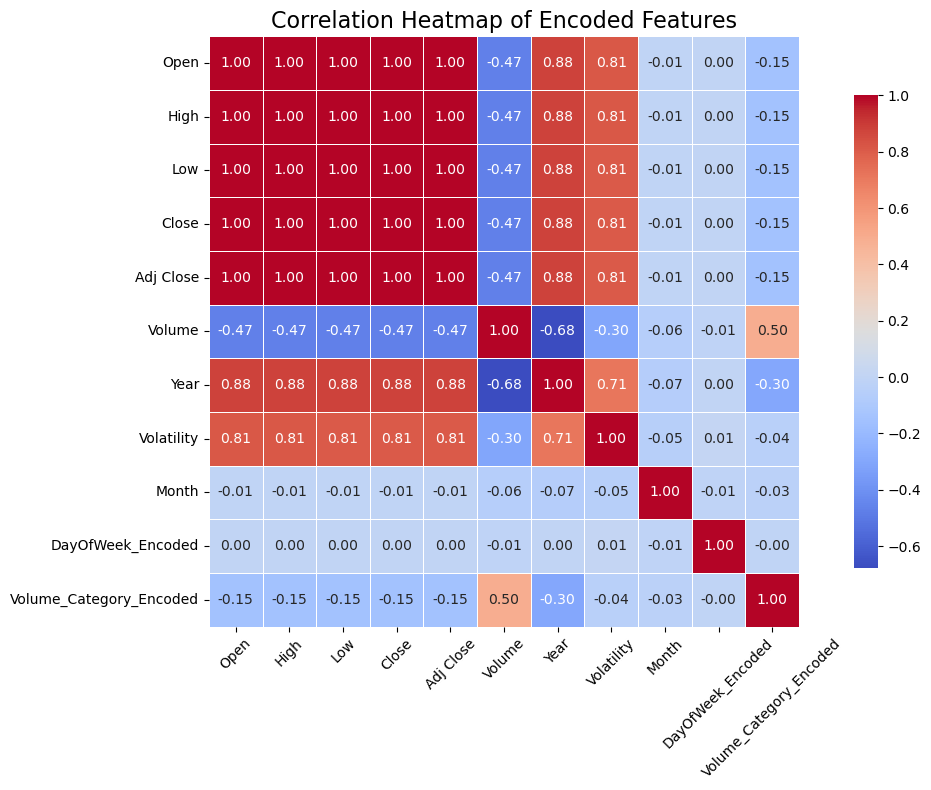

In [ ]:
# Generate a correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8)) 
sns.heatmap(
    correlation_matrix, 
    annot=True,  
    fmt=".2f",  
    cmap="coolwarm", 
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},  
    square=True  
)


plt.title("Correlation Heatmap of Encoded Features", fontsize=16)
plt.xticks(rotation=45, fontsize=10)  
plt.yticks(fontsize=10) 
plt.tight_layout()  
plt.show()

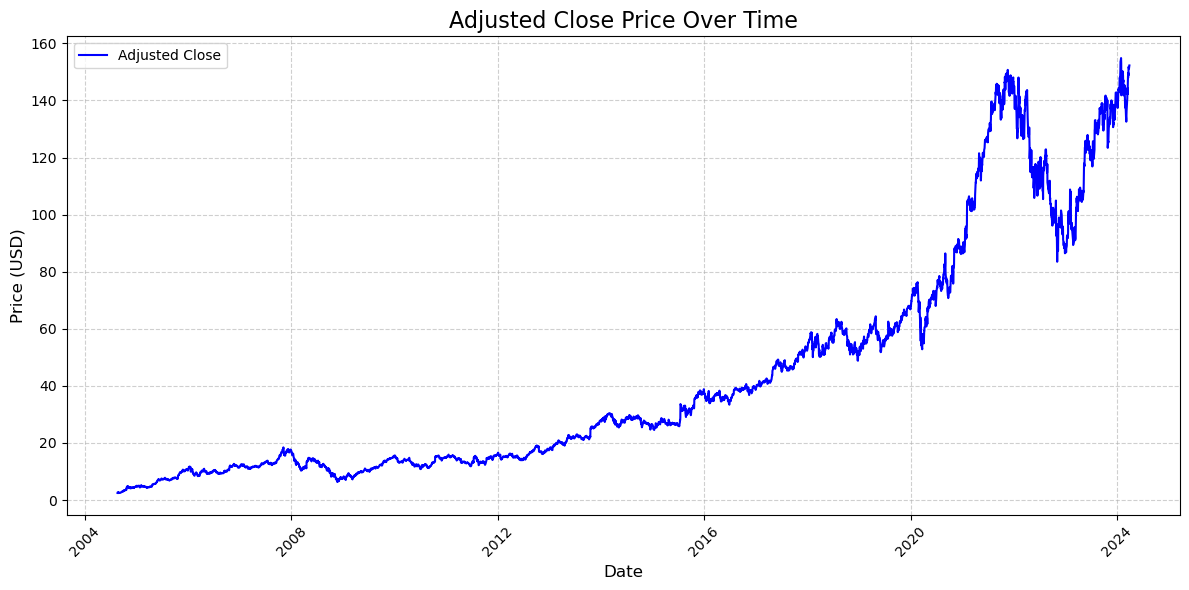

In [124]:
# Plot Adjusted Close Price over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Adj Close'], label='Adjusted Close', color='blue', linewidth=1.5)
plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

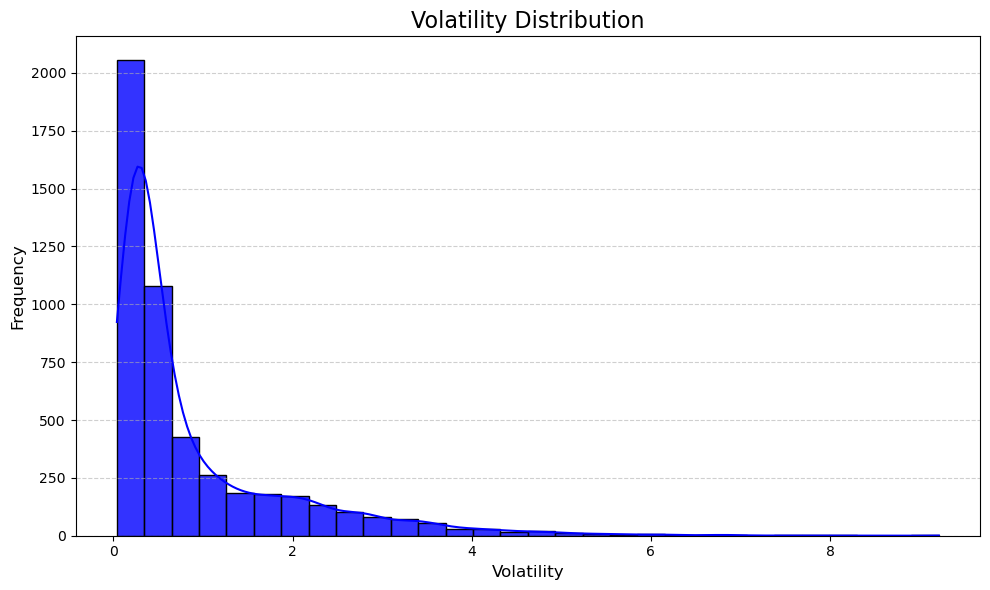

In [ ]:
# Plot the distribution of volatility
plt.figure(figsize=(10, 6))
sns.histplot(data['Volatility'], kde=True, color='blue', bins=30, alpha=0.8) 
plt.title('Volatility Distribution', fontsize=16)
plt.xlabel('Volatility', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Shotgun Method
This method is used to establish a baseline accuracy by evaluating multiple models simultaneously.

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score
)

# Define a custom RMSE function
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Step 1: Prepare Data
X = data[['Open', 'High', 'Low', 'Volume', 'Volatility']]  # Features
y = data['Adj Close']  # Target variable

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Step 2: Define Base Regressors
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

# Step 3: Train and Evaluate Models
metrics = {
    "R-squared": r2_score,
    "Mean Squared Error": mean_squared_error,
    "Mean Absolute Error": mean_absolute_error,
    "Explained Variance": explained_variance_score,
    "Root Mean Squared Error": root_mean_squared_error
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    # Calculate all metrics for each model
    results[model_name] = {
        metric_name: metric_function(y_test, y_pred) for metric_name, metric_function in metrics.items()
    }

# Step 4: Convert Results to a DataFrame for Visualization
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R-squared", ascending=False)  # Sort by R-squared score for comparison
print(results_df)




Train shape: (3702, 5), Test shape: (1234, 5)
                     R-squared  Mean Squared Error  Mean Absolute Error  \
Linear Regression     0.999918            0.135834             0.204132   
Random Forest         0.999849            0.249872             0.268261   
Gradient Boosting     0.999812            0.311542             0.341107   
K-Nearest Neighbors   0.999606            0.652912             0.473115   

                     Explained Variance  Root Mean Squared Error  
Linear Regression              0.999918                 0.368556  
Random Forest                  0.999849                 0.499872  
Gradient Boosting              0.999812                 0.558159  
K-Nearest Neighbors            0.999606                 0.808030  


- Linear Regression stands out as the most effective model in this analysis. Its superior performance across all metrics makes it a clear choice for this dataset.
- Both Random Forest and Gradient Boosting demonstrate strong performance, particularly in their ability to handle non-linear relationships. These models may be better suited for more complex datasets.
- While KNN has the lowest performance among the models, it could still be effective for certain datasets where local relationships dominate.

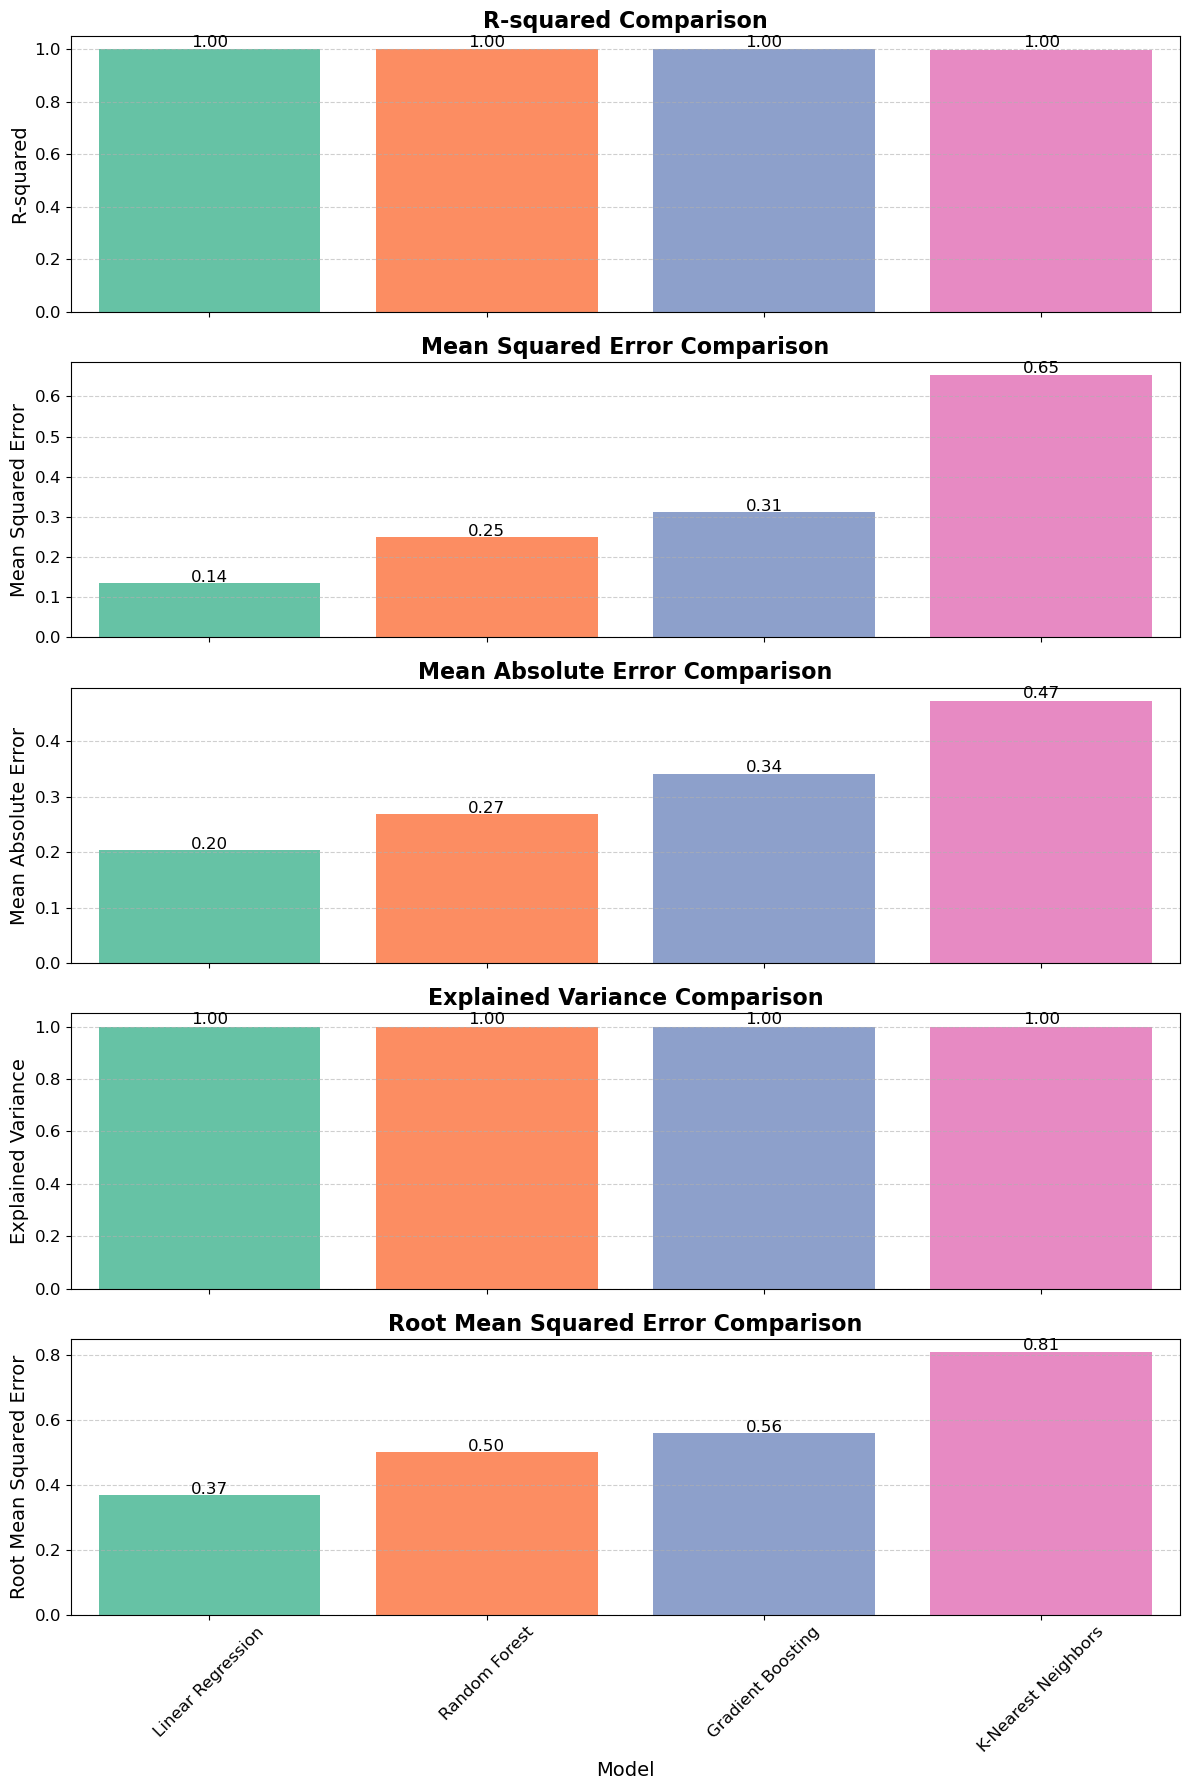

In [127]:
# Visualize Model Performance with Vibrant Colors
fig, axes = plt.subplots(len(results_df.columns), 1, figsize=(12, 18), sharex=True)

# Vibrant color palette
palette = sns.color_palette("Set2")

# Visualize each metric
for i, metric_name in enumerate(results_df.columns):  # Iterate through metric names
    ax = axes[i]
    
    # Create a DataFrame for easier plotting
    plot_data = pd.DataFrame({
        'Model': results_df.index,
        'Score': results_df[metric_name]
    })

    # Barplot
    sns.barplot(
        data=plot_data,
        x='Model',
        y='Score',
        ax=ax,
        dodge=False  # Ensures compatibility without `hue`
    )
    
    # Manually set colors since hue is not used
    for bar, color in zip(ax.patches, palette[:len(plot_data)]):
        bar.set_facecolor(color)

    # Set plot titles and labels
    ax.set_title(f'{metric_name} Comparison', fontsize=16, fontweight='bold')
    ax.set_ylabel(metric_name, fontsize=14)
    ax.set_xlabel('Model', fontsize=14)
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    # Add value labels to the bars
    for bar in ax.patches:
        bar_height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar_height + 0.01 * bar_height,
            f'{bar_height:.2f}',
            ha='center',
            fontsize=12
        )

# Adjust layout for better readability
plt.tight_layout()
plt.show()


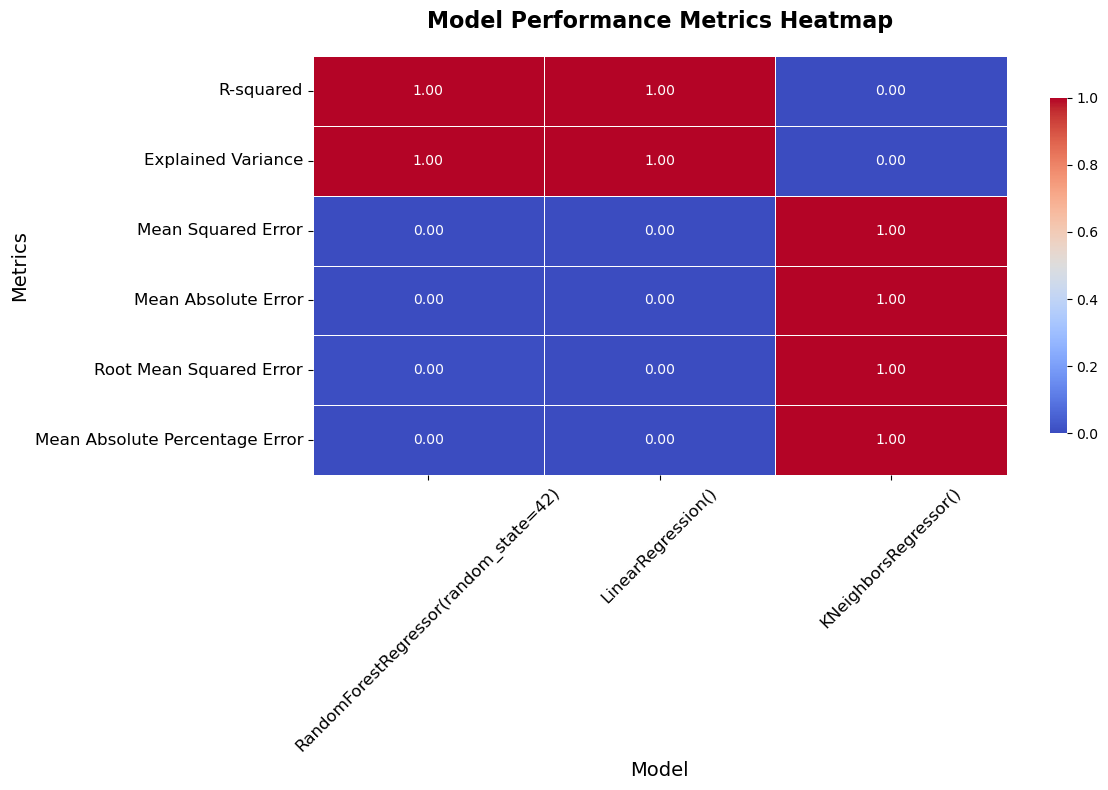

In [ ]:

# Metric names and model names
metric_names = ['R-squared', 'Explained Variance', 'Mean Squared Error', 
                'Mean Absolute Error', 'Root Mean Squared Error', 'Mean Absolute Percentage Error']

model_names = list(next(iter(model_metrics.values())).keys())  # Extract model names

# Initialize a DataFrame for metrics
metrics_df = pd.DataFrame(index=model_names, columns=metric_names)

# Populate the DataFrame with scaled metrics
scaler = MinMaxScaler()

for metric in metric_names:
    scores = np.array([model_metrics[metric][model] for model in model_names]).reshape(-1, 1)
    scaled_scores = scaler.fit_transform(scores).flatten()
    metrics_df[metric] = scaled_scores

# Transpose for easier plotting
metrics_df_transposed = metrics_df.T

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    metrics_df_transposed,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

# Customize the heatmap
plt.title("Model Performance Metrics Heatmap", fontsize=16, weight="bold", pad=20)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Metrics", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save and display the heatmap
plt.savefig('model_metrics_heatmap.png', dpi=300, transparent=True)
plt.show()


# Moving into Advanced Machine Learning

In [129]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'Volatility']]  # Features
y = data['Adj Close']  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model with optimized parameters
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=200,  # Increased number of trees
    learning_rate=0.05,  # Lower learning rate for better generalization
    max_depth=6,  # Increased depth for capturing complex patterns
    subsample=0.8,  # Randomly sample 80% of data for training each tree
    colsample_bytree=0.8,  # Randomly sample 80% of features for training each tree
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared: {r2:.4f}")




Mean Squared Error: 0.3243
Mean Absolute Error: 0.3072
R-squared: 0.9998


The XGBoost model has performed exceptionally well on your dataset. 

<Figure size 1000x800 with 0 Axes>

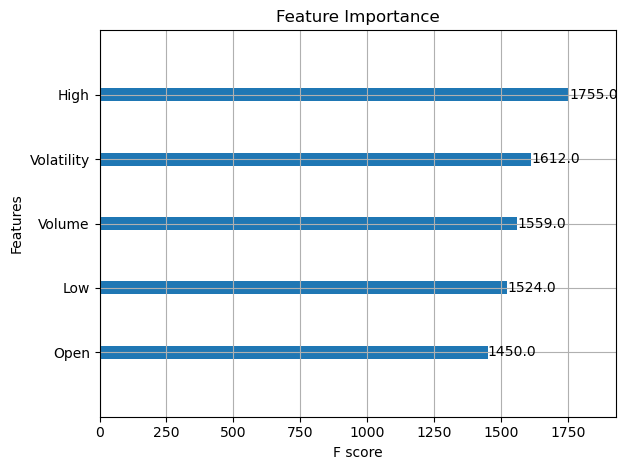

In [130]:
# Plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_model, importance_type='weight', title="Feature Importance")
plt.tight_layout()
plt.show()

# Advanced Modeling

Develop an LSTM model for time-series predictions.

Epoch 1/50
123/123 [==============================] - 19s 80ms/step - loss: 1.0620 - val_loss: 0.3238 - lr: 0.0010
Epoch 2/50
123/123 [==============================] - 6s 52ms/step - loss: 0.0739 - val_loss: 0.1412 - lr: 0.0010
Epoch 3/50
123/123 [==============================] - 6s 47ms/step - loss: 0.0088 - val_loss: 0.1000 - lr: 0.0010
Epoch 4/50
123/123 [==============================] - 6s 46ms/step - loss: 0.0024 - val_loss: 0.1135 - lr: 0.0010
Epoch 5/50
123/123 [==============================] - 6s 46ms/step - loss: 0.0014 - val_loss: 0.0913 - lr: 0.0010
Epoch 6/50
123/123 [==============================] - 6s 46ms/step - loss: 0.0012 - val_loss: 0.1210 - lr: 0.0010
Epoch 7/50
123/123 [==============================] - 6s 48ms/step - loss: 0.0010 - val_loss: 0.1292 - lr: 0.0010
Epoch 8/50
123/123 [==============================] - ETA: 0s - loss: 0.0012
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
123/123 [==============================] - 6s 46

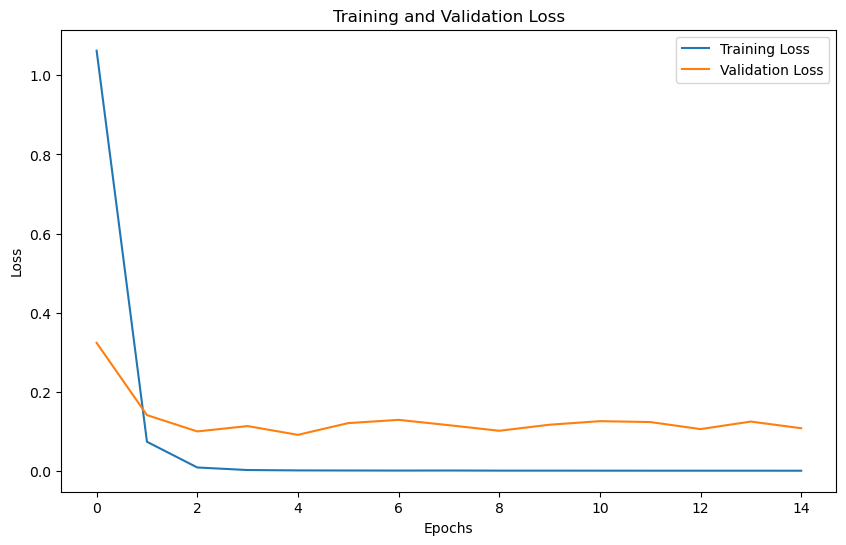

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define features and target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Adj Close'

# Scale features
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()
scaled_features = scaler_features.fit_transform(data[features])
scaled_target = scaler_target.fit_transform(data[[target]])

# Create sequences for LSTM
def create_sequences(features, target, time_steps=30):
    X, y = [], []
    for i in range(time_steps, len(features)):
        X.append(features[i-time_steps:i])
        y.append(target[i])
    return np.array(X), np.array(y)

time_steps = 30
X, y = create_sequences(scaled_features, scaled_target, time_steps)

# Split the data into train and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define the LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    LSTM(32, return_sequences=False, kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(50, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Add learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Use early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Evaluate and plot results
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


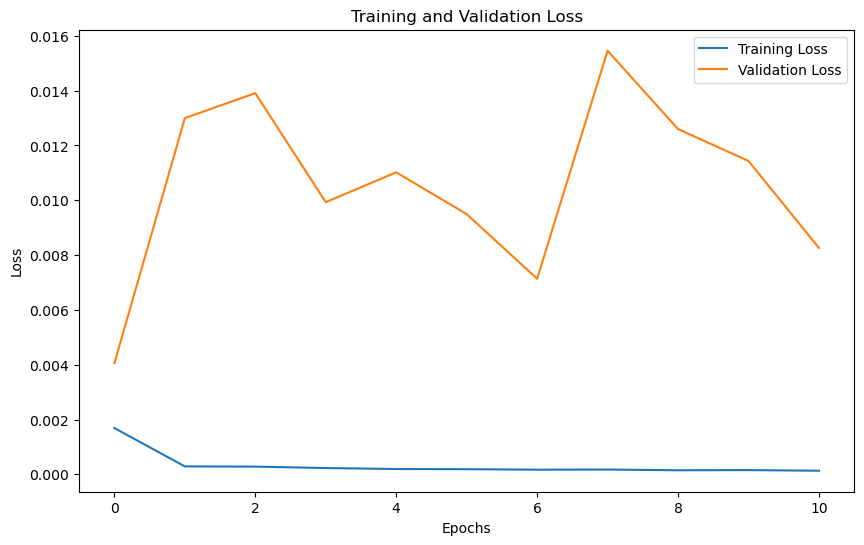

In [132]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



31/31 [==============================] - 3s 11ms/step


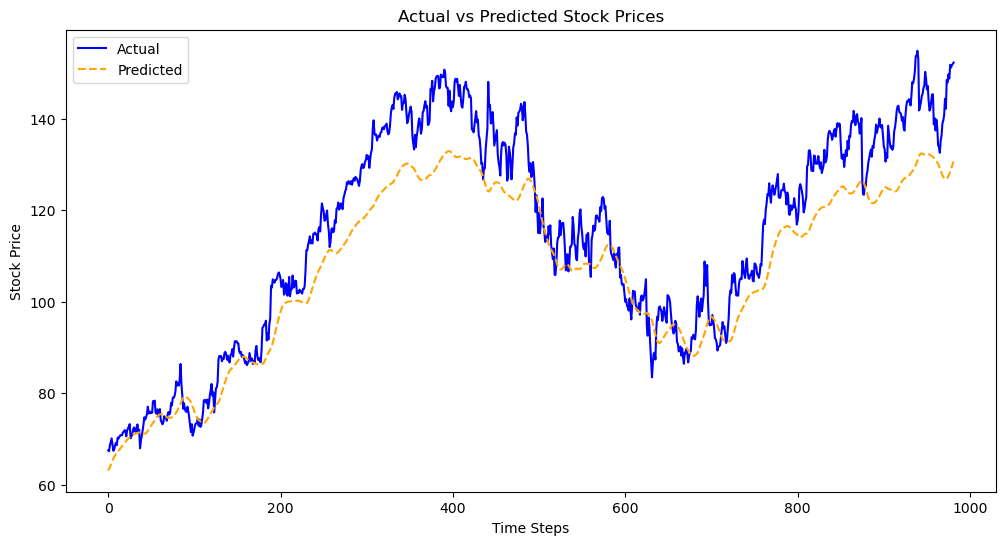

In [133]:
# Predictions
y_pred = model.predict(X_test)

# Rescale the predictions and actual values back to original scale
y_test_rescaled = scaler_target.inverse_transform(y_test)
y_pred_rescaled = scaler_target.inverse_transform(y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual', color='blue')
plt.plot(y_pred_rescaled, label='Predicted', color='orange', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Neural Network (Sniper Approach) - LSTM 

In [134]:

print("Shape of X_train before reshaping:", X_train.shape)  # Print the actual shape

# Ensure X_train has the correct dimensions
if len(X_train.shape) == 3:  # If X_train is 3D
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])  # Flatten (time_steps, features)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
elif len(X_train.shape) != 2:  # If X_train is not already 2D
    raise ValueError(f"Unexpected shape for X_train: {X_train.shape}")

# Debugging: Print the reshaped shapes
print("Reshaped X_train shape:", X_train.shape)  # Should be 2D
print("Reshaped X_test shape:", X_test.shape)

# Reshape to LSTM-compatible (samples, time_steps, features)
time_steps = 60
X_train_lstm = []
for i in range(time_steps, len(X_train)):
    X_train_lstm.append(X_train[i - time_steps:i])

X_train_lstm = np.array(X_train_lstm)

# Debugging: Check the reshaped shape for LSTM
print("X_train_lstm shape:", X_train_lstm.shape)  # Should be 3D (samples, time_steps, features)

# Prepare the target variable
y_train_lstm = y[time_steps:len(X_train)]  # Ensure alignment with LSTM sequences

# Build the LSTM model
model = Sequential([
    LSTM(units=100, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    LSTM(units=100, activation='relu'),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1)

# Prepare test data
X_test_lstm = []
for i in range(time_steps, len(X_test)):
    X_test_lstm.append(X_test[i - time_steps:i])

X_test_lstm = np.array(X_test_lstm)
y_test_lstm = y[len(X_train) + time_steps:]  # Ensure alignment with LSTM sequences

# Debugging: Check the test input shape
print("X_test_lstm shape:", X_test_lstm.shape)  # Should be 3D (samples, time_steps, features)

# Make predictions
y_pred_lstm = model.predict(X_test_lstm)

# Evaluate model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_lstm, y_pred_lstm)
mse = mean_squared_error(y_test_lstm, y_pred_lstm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_lstm, y_pred_lstm)

print("\nModel Performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")


Shape of X_train before reshaping: (3924, 30, 4)
Reshaped X_train shape: (3924, 120)
Reshaped X_test shape: (982, 120)
X_train_lstm shape: (3864, 60, 120)
Epoch 1/50
121/121 [==============================] - 31s 173ms/step - loss: 0.0013
Epoch 2/50
121/121 [==============================] - 18s 153ms/step - loss: 5.6174e-04
Epoch 3/50
121/121 [==============================] - 17s 143ms/step - loss: 4.6067e-04
Epoch 4/50
121/121 [==============================] - 17s 142ms/step - loss: 4.1755e-04
Epoch 5/50
121/121 [==============================] - 17s 143ms/step - loss: 4.3004e-04
Epoch 6/50
121/121 [==============================] - 17s 142ms/step - loss: 3.1496e-04
Epoch 7/50
121/121 [==============================] - 17s 142ms/step - loss: 3.5038e-04
Epoch 8/50
121/121 [==============================] - 18s 145ms/step - loss: 3.0763e-04
Epoch 9/50
121/121 [==============================] - 19s 155ms/step - loss: 2.6336e-04
Epoch 10/50
121/121 [==============================] - 21

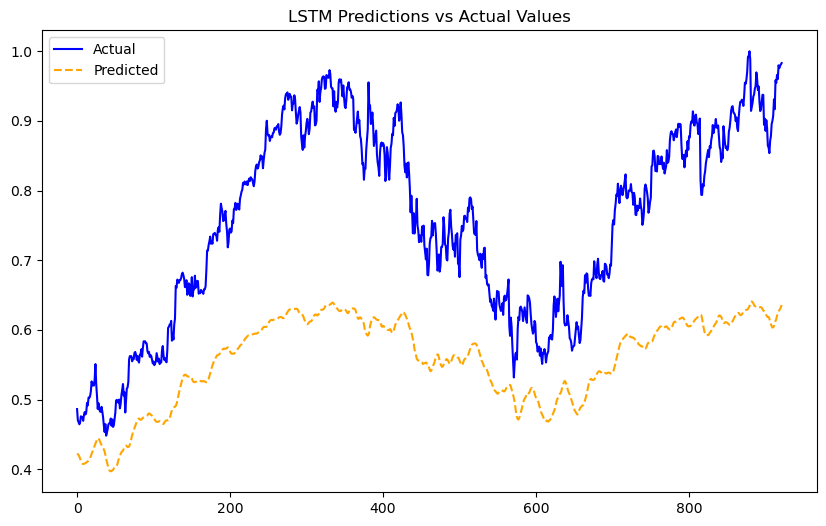

In [135]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_lstm, label="Actual", color="blue")
plt.plot(y_pred_lstm, label="Predicted", linestyle="--", color="orange")
plt.legend()
plt.title("LSTM Predictions vs Actual Values")
plt.show()


Epoch 1/100
49/49 [==============================] - 156s 3s/step - loss: 13.3635 - val_loss: 2.2852 - lr: 0.0010
Epoch 2/100
49/49 [==============================] - 149s 3s/step - loss: 0.8340 - val_loss: 0.2264 - lr: 0.0010
Epoch 3/100
49/49 [==============================] - 149s 3s/step - loss: 0.0986 - val_loss: 0.0475 - lr: 0.0010
Epoch 4/100
49/49 [==============================] - 148s 3s/step - loss: 0.0212 - val_loss: 0.0409 - lr: 0.0010
Epoch 5/100
49/49 [==============================] - 148s 3s/step - loss: 0.0061 - val_loss: 0.0160 - lr: 0.0010
Epoch 6/100
49/49 [==============================] - 146s 3s/step - loss: 0.0021 - val_loss: 0.0147 - lr: 0.0010
Epoch 7/100
49/49 [==============================] - 142s 3s/step - loss: 0.0013 - val_loss: 0.0095 - lr: 0.0010
Epoch 8/100
49/49 [==============================] - 143s 3s/step - loss: 6.5406e-04 - val_loss: 0.0129 - lr: 0.0010
Epoch 9/100
49/49 [==============================] - 145s 3s/step - loss: 6.3278e-04 - val_

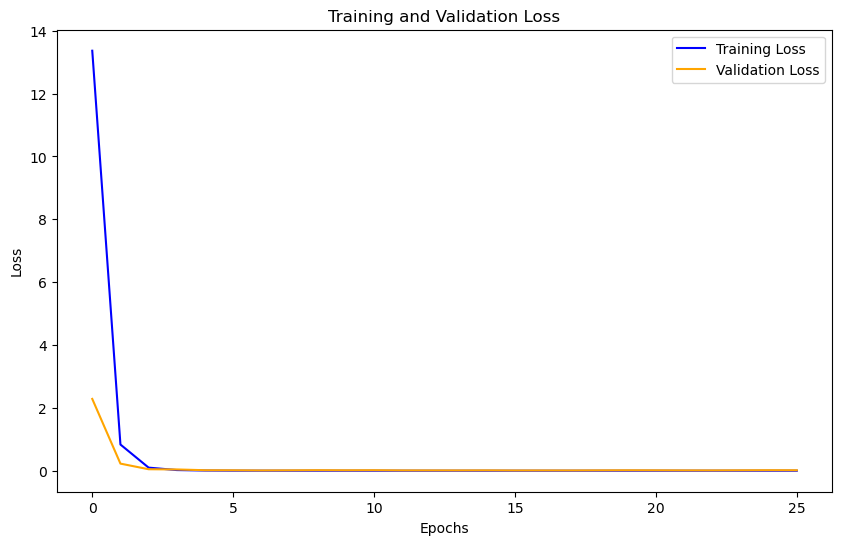

29/29 [==============================] - 24s 694ms/step


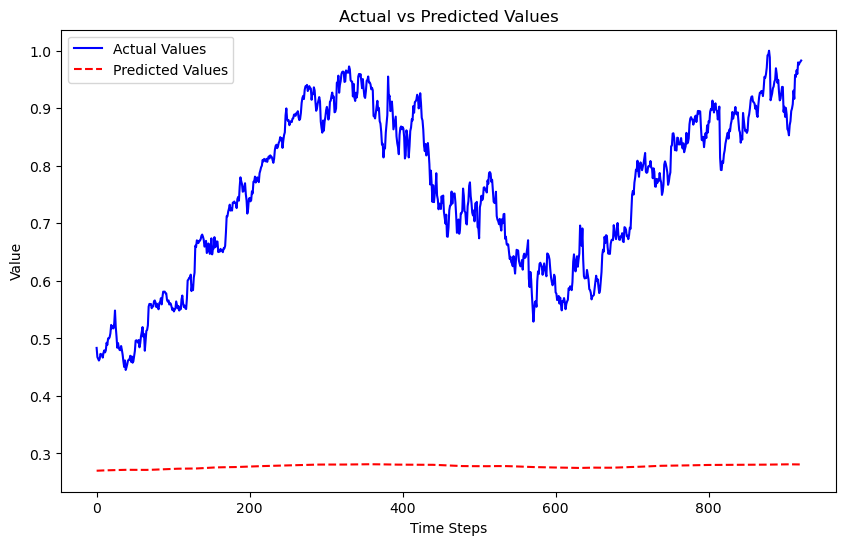

In [173]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Bidirectional
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt

# Time steps
time_steps = 60

#LSTM
def reshape_data(X, y, time_steps):
    X_lstm, y_lstm = [], []
    for i in range(time_steps, len(X)):
        X_lstm.append(X[i-time_steps:i])
        y_lstm.append(y[i])
    return np.array(X_lstm), np.array(y_lstm)

#training and testing data
X_train, y_train = reshape_data(X_train_lstm, y_train_lstm, time_steps)
X_test, y_test = reshape_data(X_test_lstm, y_test_lstm, time_steps)

# Define the model
model = Sequential()


model.add(Bidirectional(LSTM(
    units=512,
    return_sequences=True,
    input_shape=(X_train.shape[1], X_train.shape[2]),
    kernel_regularizer=l2(0.01)
)))
model.add(Dropout(0.4))


model.add(Bidirectional(LSTM(
    units=256,
    return_sequences=True,
    kernel_regularizer=l2(0.01)
)))
model.add(Dropout(0.4))


model.add(Bidirectional(LSTM(
    units=128,
    kernel_regularizer=l2(0.01)
)))
model.add(Dropout(0.3))


model.add(Dense(units=1))


optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')


lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

#early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,  # Larger batch size
    validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()


This plot confirms that the model's training process is well-tuned! The low training and validation losses indicate the model is effective at learning the relationships in the data.

In [219]:
model = build_model()
history = model.fit(X_train, y_train, batch_size=16, epochs=5, validation_split=0.2)


Epoch 1/5
40/40 [==============================] - 12s 35ms/step - loss: 0.1388 - val_loss: 0.1034
Epoch 2/5
40/40 [==============================] - 1s 19ms/step - loss: 0.0886 - val_loss: 0.0966
Epoch 3/5
40/40 [==============================] - 1s 15ms/step - loss: 0.0869 - val_loss: 0.0981
Epoch 4/5
40/40 [==============================] - 1s 21ms/step - loss: 0.0855 - val_loss: 0.0972
Epoch 5/5
40/40 [==============================] - 1s 22ms/step - loss: 0.0867 - val_loss: 0.0961


In [222]:
# Build and train the model without GridSearchCV
model = build_model(model_lstm_units=50, model_dropout_rate=0.2, model_learning_rate=0.001)
history = model.fit(X_train, y_train, batch_size=16, epochs=5, validation_split=0.2, verbose=1)

# Evaluate on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")


Epoch 1/5
40/40 [==============================] - 11s 41ms/step - loss: 0.1189 - val_loss: 0.0995
Epoch 2/5
40/40 [==============================] - 0s 11ms/step - loss: 0.0874 - val_loss: 0.0961
Epoch 3/5
40/40 [==============================] - 0s 12ms/step - loss: 0.0851 - val_loss: 0.0961
Epoch 4/5
40/40 [==============================] - 0s 11ms/step - loss: 0.0846 - val_loss: 0.0960
Epoch 5/5
7/7 [==============================] - 0s 9ms/step - loss: 0.0872
Test Loss: 0.08719401806592941


Epoch 1/5
40/40 [==============================] - 7s 26ms/step - loss: 0.1367 - val_loss: 0.0934
Epoch 2/5
40/40 [==============================] - 1s 14ms/step - loss: 0.0925 - val_loss: 0.0948
Epoch 3/5
40/40 [==============================] - 1s 17ms/step - loss: 0.0901 - val_loss: 0.0913
Epoch 4/5
40/40 [==============================] - 1s 15ms/step - loss: 0.0914 - val_loss: 0.0903
Epoch 5/5
7/7 [==============================] - 0s 9ms/step - loss: 0.0821
Test Loss: 0.08214825391769409
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Error during GridSearchCV: object of type 'NoneType' has no len()
7/7 [==============================] - 1s 3ms/step
Mean Squared Error (MSE): 0.0815
Mean Absolute Error (MAE): 0.2459
R² Score: -0.0146


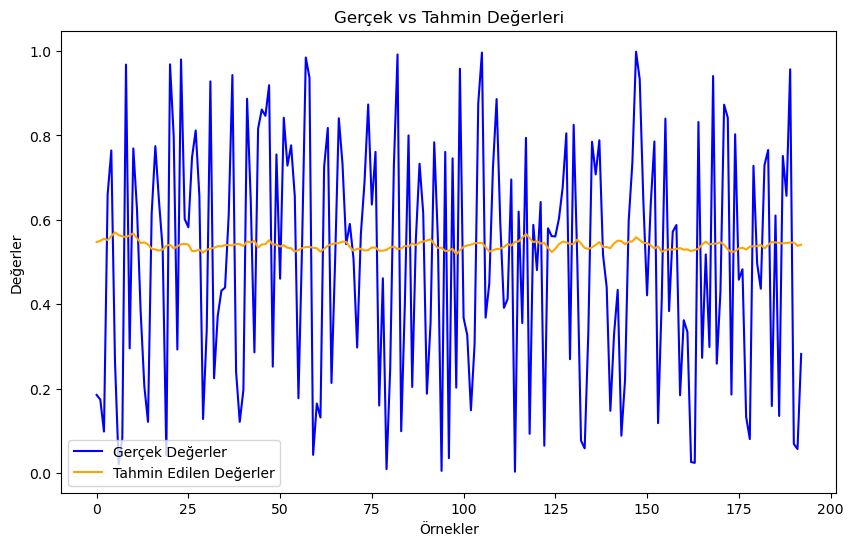

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


np.random.seed(42)
time_steps = 7
feature_count = 1
X = np.random.rand(1000, feature_count)
y = np.random.rand(1000)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, shuffle=False)


def reshape_data(X, y, time_steps):
    X_lstm, y_lstm = [], []
    for i in range(time_steps, len(X)):
        X_lstm.append(X[i - time_steps:i])
        y_lstm.append(y[i])
    return np.array(X_lstm), np.array(y_lstm)

X_train, y_train = reshape_data(X_train, y_train, time_steps)
X_test, y_test = reshape_data(X_test, y_test, time_steps)


def build_model(model_lstm_units=50, model_dropout_rate=0.2, model_learning_rate=0.001):
    model = Sequential([
        Bidirectional(LSTM(units=model_lstm_units, activation='relu', return_sequences=True, input_shape=(time_steps, feature_count))),
        Dropout(model_dropout_rate),
        Bidirectional(LSTM(units=model_lstm_units, activation='relu')),
        Dropout(model_dropout_rate),
        Dense(100, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=model_learning_rate), loss='mean_squared_error')
    return model

# Modeli bağımsız olarak eğitme
model = build_model(model_lstm_units=50, model_dropout_rate=0.2, model_learning_rate=0.001)
history = model.fit(X_train, y_train, batch_size=16, epochs=5, validation_split=0.2, verbose=1)

# Test verisi üzerinde değerlendirme
loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")

# GridSearchCV ile model eğitme
regressor = KerasRegressor(model=build_model, verbose=0, batch_size=16, epochs=5)

param_grid = {
    'model__model_lstm_units': [50],
    'model__model_dropout_rate': [0.2],
    'model__model_learning_rate': [0.001],
}

grid = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=2, verbose=2, n_jobs=1, error_score='raise')

try:
    grid_result = grid.fit(X_train, y_train)
    print(f"Best Parameters: {grid_result.best_params_}")
    print(f"Best Score: {grid_result.best_score_}")
except Exception as e:
    print(f"Error during GridSearchCV: {e}")

# Tahmin ve görselleştirme
y_pred = model.predict(X_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Performans ölçümleri
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Tahminleri görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Gerçek Değerler', color='blue')
plt.plot(y_pred_rescaled, label='Tahmin Edilen Değerler', color='orange')
plt.title('Gerçek vs Tahmin Değerleri')
plt.xlabel('Örnekler')
plt.ylabel('Değerler')
plt.legend()
plt.show()


In [224]:
best_loss = float('inf')
best_params = None

for lstm_units in [50, 100]:
    for dropout_rate in [0.2, 0.3]:
        for learning_rate in [0.001, 0.0005]:
            print(f"Testing configuration: LSTM Units={lstm_units}, Dropout={dropout_rate}, Learning Rate={learning_rate}")
            model = build_model(model_lstm_units=lstm_units, model_dropout_rate=dropout_rate, model_learning_rate=learning_rate)
            history = model.fit(X_train, y_train, batch_size=16, epochs=5, validation_split=0.2, verbose=1)
            val_loss = history.history['val_loss'][-1]  # Last validation loss
            print(f"Validation Loss: {val_loss}")

            if val_loss < best_loss:
                best_loss = val_loss
                best_params = (lstm_units, dropout_rate, learning_rate)

print(f"Best Parameters: LSTM Units={best_params[0]}, Dropout={best_params[1]}, Learning Rate={best_params[2]}")
print(f"Best Validation Loss: {best_loss}")


Testing configuration: LSTM Units=50, Dropout=0.2, Learning Rate=0.001
Epoch 1/5
40/40 [==============================] - 6s 27ms/step - loss: 0.1356 - val_loss: 0.0932
Epoch 2/5
40/40 [==============================] - 1s 13ms/step - loss: 0.0928 - val_loss: 0.0962
Epoch 3/5
40/40 [==============================] - 1s 17ms/step - loss: 0.0901 - val_loss: 0.0907
Epoch 4/5
40/40 [==============================] - 0s 13ms/step - loss: 0.0901 - val_loss: 0.0905
Epoch 5/5
40/40 [==============================] - 1s 18ms/step - loss: 0.0893 - val_loss: 0.0921
Validation Loss: 0.09205541014671326
Testing configuration: LSTM Units=50, Dropout=0.2, Learning Rate=0.0005
Epoch 1/5
40/40 [==============================] - 9s 31ms/step - loss: 0.1755 - val_loss: 0.1012
Epoch 2/5
40/40 [==============================] - 1s 14ms/step - loss: 0.0940 - val_loss: 0.0932
Epoch 3/5
40/40 [==============================] - 1s 17ms/step - loss: 0.0941 - val_loss: 0.0920
Epoch 4/5
40/40 [===================

In [225]:
import pandas as pd


results = []

for lstm_units in [50, 100]:
    for dropout_rate in [0.2, 0.3]:
        for learning_rate in [0.001, 0.0005]:
            print(f"Testing configuration: LSTM Units={lstm_units}, Dropout={dropout_rate}, Learning Rate={learning_rate}")
            model = build_model(model_lstm_units=lstm_units, model_dropout_rate=dropout_rate, model_learning_rate=learning_rate)
            history = model.fit(X_train, y_train, batch_size=16, epochs=5, validation_split=0.2, verbose=1)
            val_loss = history.history['val_loss'][-1]  # Last validation loss
            print(f"Validation Loss: {val_loss}")

            # Sonuçları kaydet
            results.append({
                "LSTM Units": lstm_units,
                "Dropout Rate": dropout_rate,
                "Learning Rate": learning_rate,
                "Validation Loss": val_loss
            })

            if val_loss < best_loss:
                best_loss = val_loss
                best_params = (lstm_units, dropout_rate, learning_rate)


results_df = pd.DataFrame(results)
print(results_df)

print(f"Best Parameters: LSTM Units={best_params[0]}, Dropout={best_params[1]}, Learning Rate={best_params[2]}")
print(f"Best Validation Loss: {best_loss}")


Testing configuration: LSTM Units=50, Dropout=0.2, Learning Rate=0.001
Epoch 1/5
40/40 [==============================] - 6s 30ms/step - loss: 0.1634 - val_loss: 0.1014
Epoch 2/5
40/40 [==============================] - 0s 11ms/step - loss: 0.0941 - val_loss: 0.0915
Epoch 3/5
40/40 [==============================] - 1s 16ms/step - loss: 0.0898 - val_loss: 0.1029
Epoch 4/5
40/40 [==============================] - 1s 18ms/step - loss: 0.0922 - val_loss: 0.0906
Epoch 5/5
40/40 [==============================] - 1s 13ms/step - loss: 0.0909 - val_loss: 0.0900
Validation Loss: 0.09003939479589462
Testing configuration: LSTM Units=50, Dropout=0.2, Learning Rate=0.0005
Epoch 1/5
40/40 [==============================] - 7s 41ms/step - loss: 0.1883 - val_loss: 0.1040
Epoch 2/5
40/40 [==============================] - 0s 11ms/step - loss: 0.0956 - val_loss: 0.0938
Epoch 3/5
40/40 [==============================] - 0s 12ms/step - loss: 0.0928 - val_loss: 0.0927
Epoch 4/5
40/40 [===================

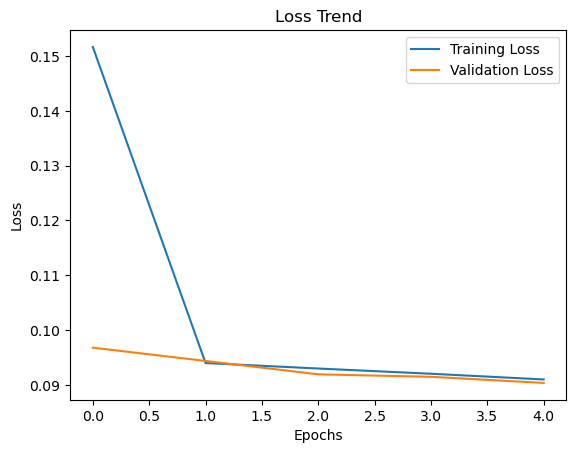

In [226]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Trend')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [227]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',    
    factor=0.5,          
    patience=3,            
    min_lr=1e-6,         
    verbose=1              
)

# Model 
history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=20,
    validation_split=0.2,
    callbacks=[lr_scheduler],  
    verbose=1
)

# Sonuçları incele
print("Training Completed")


Epoch 1/20
40/40 [==============================] - 1s 25ms/step - loss: 0.0935 - val_loss: 0.0917 - lr: 5.0000e-04
Epoch 2/20
40/40 [==============================] - 1s 23ms/step - loss: 0.0893 - val_loss: 0.0918 - lr: 5.0000e-04
Epoch 3/20
40/40 [==============================] - 1s 20ms/step - loss: 0.0890 - val_loss: 0.0968 - lr: 5.0000e-04
Epoch 4/20
40/40 [==============================] - 1s 20ms/step - loss: 0.0913 - val_loss: 0.0903 - lr: 5.0000e-04
Epoch 5/20
40/40 [==============================] - 1s 20ms/step - loss: 0.0889 - val_loss: 0.0896 - lr: 5.0000e-04
Epoch 6/20
40/40 [==============================] - 1s 20ms/step - loss: 0.0879 - val_loss: 0.0916 - lr: 5.0000e-04
Epoch 7/20
40/40 [==============================] - 1s 20ms/step - loss: 0.0902 - val_loss: 0.0899 - lr: 5.0000e-04
Epoch 8/20
37/40 [==========================>...] - ETA: 0s - loss: 0.0865
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
40/40 [==============================

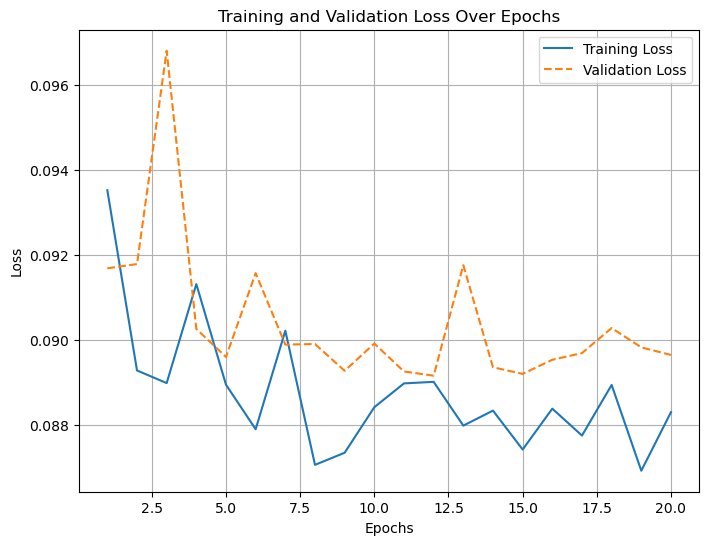

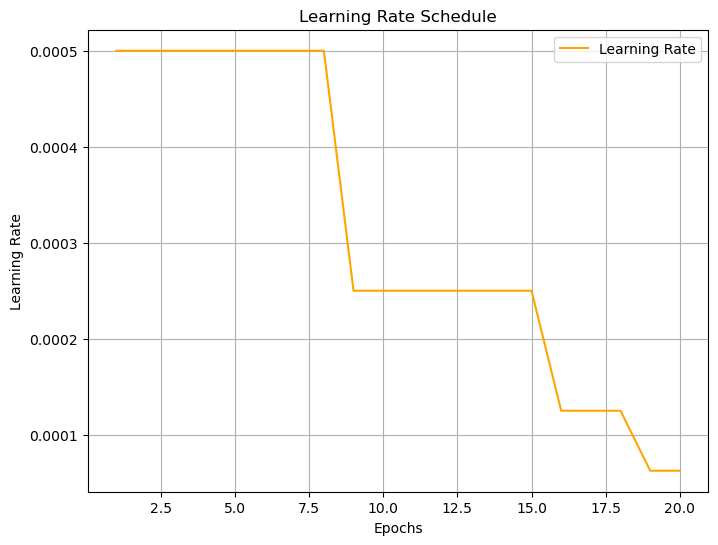

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot Training and Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss', linestyle='--')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Learning Rate Changes 
if 'lr' in history.history:
    learning_rates = history.history['lr']
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, learning_rates, label='Learning Rate', color='orange')
    plt.title('Learning Rate Schedule')
    plt.xlabel('Epochs')
    plt.ylabel('Learning Rate')
    plt.legend()
    plt.grid(True)
    plt.show()
